In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score,f1_score, roc_auc_score, roc_curve, classification_report,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold



import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df["Age"].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [59]:
# O código verifica a distribuição dos valores na coluna 'Age' utilizando 
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count'] 

fig = px.bar(age_counts, x='Age', y='Count', title='Distribution of Age')
fig.show()

In [ ]:
# Calcula a matriz de correlação entre as colunas numéricas do DataFrame df. 
# Essa matriz mostra a relação entre cada par de variáveis, variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita).
px.imshow(df.corr(),text_auto='.02')

In [60]:
# permite visualizar a distribuição de classes na variável "Outcome", sendo útil para verificar se os dados estão balanceados ou 
# se há desbalanceamento entre as categorias (por exemplo, mais casos positivos do que negativos).
Outcome_counts = df['Outcome'].value_counts().reset_index()
Outcome_counts.columns = ['Outcome', 'Count'] 

fig = px.bar(Outcome_counts, x='Outcome', y='Count', title='Distribution of Outcome')
fig.show()

In [ ]:
# Verifica a distribuição de pacientes com e sem diabetes.
Outcome_counts = df['Outcome'].value_counts().reset_index()
Outcome_counts.columns = ['Outcome', 'Count']

fig = px.pie(Outcome_counts, values='Count', names='Outcome', 
             title='Outcome Distribution (Diabetes: 1, No Diabetes: 0)',
             color_discrete_sequence=["cyan", "lightcyan"])

fig.update_traces(textinfo='percent+label')

fig.show()

<Axes: xlabel='Age', ylabel='Density'>

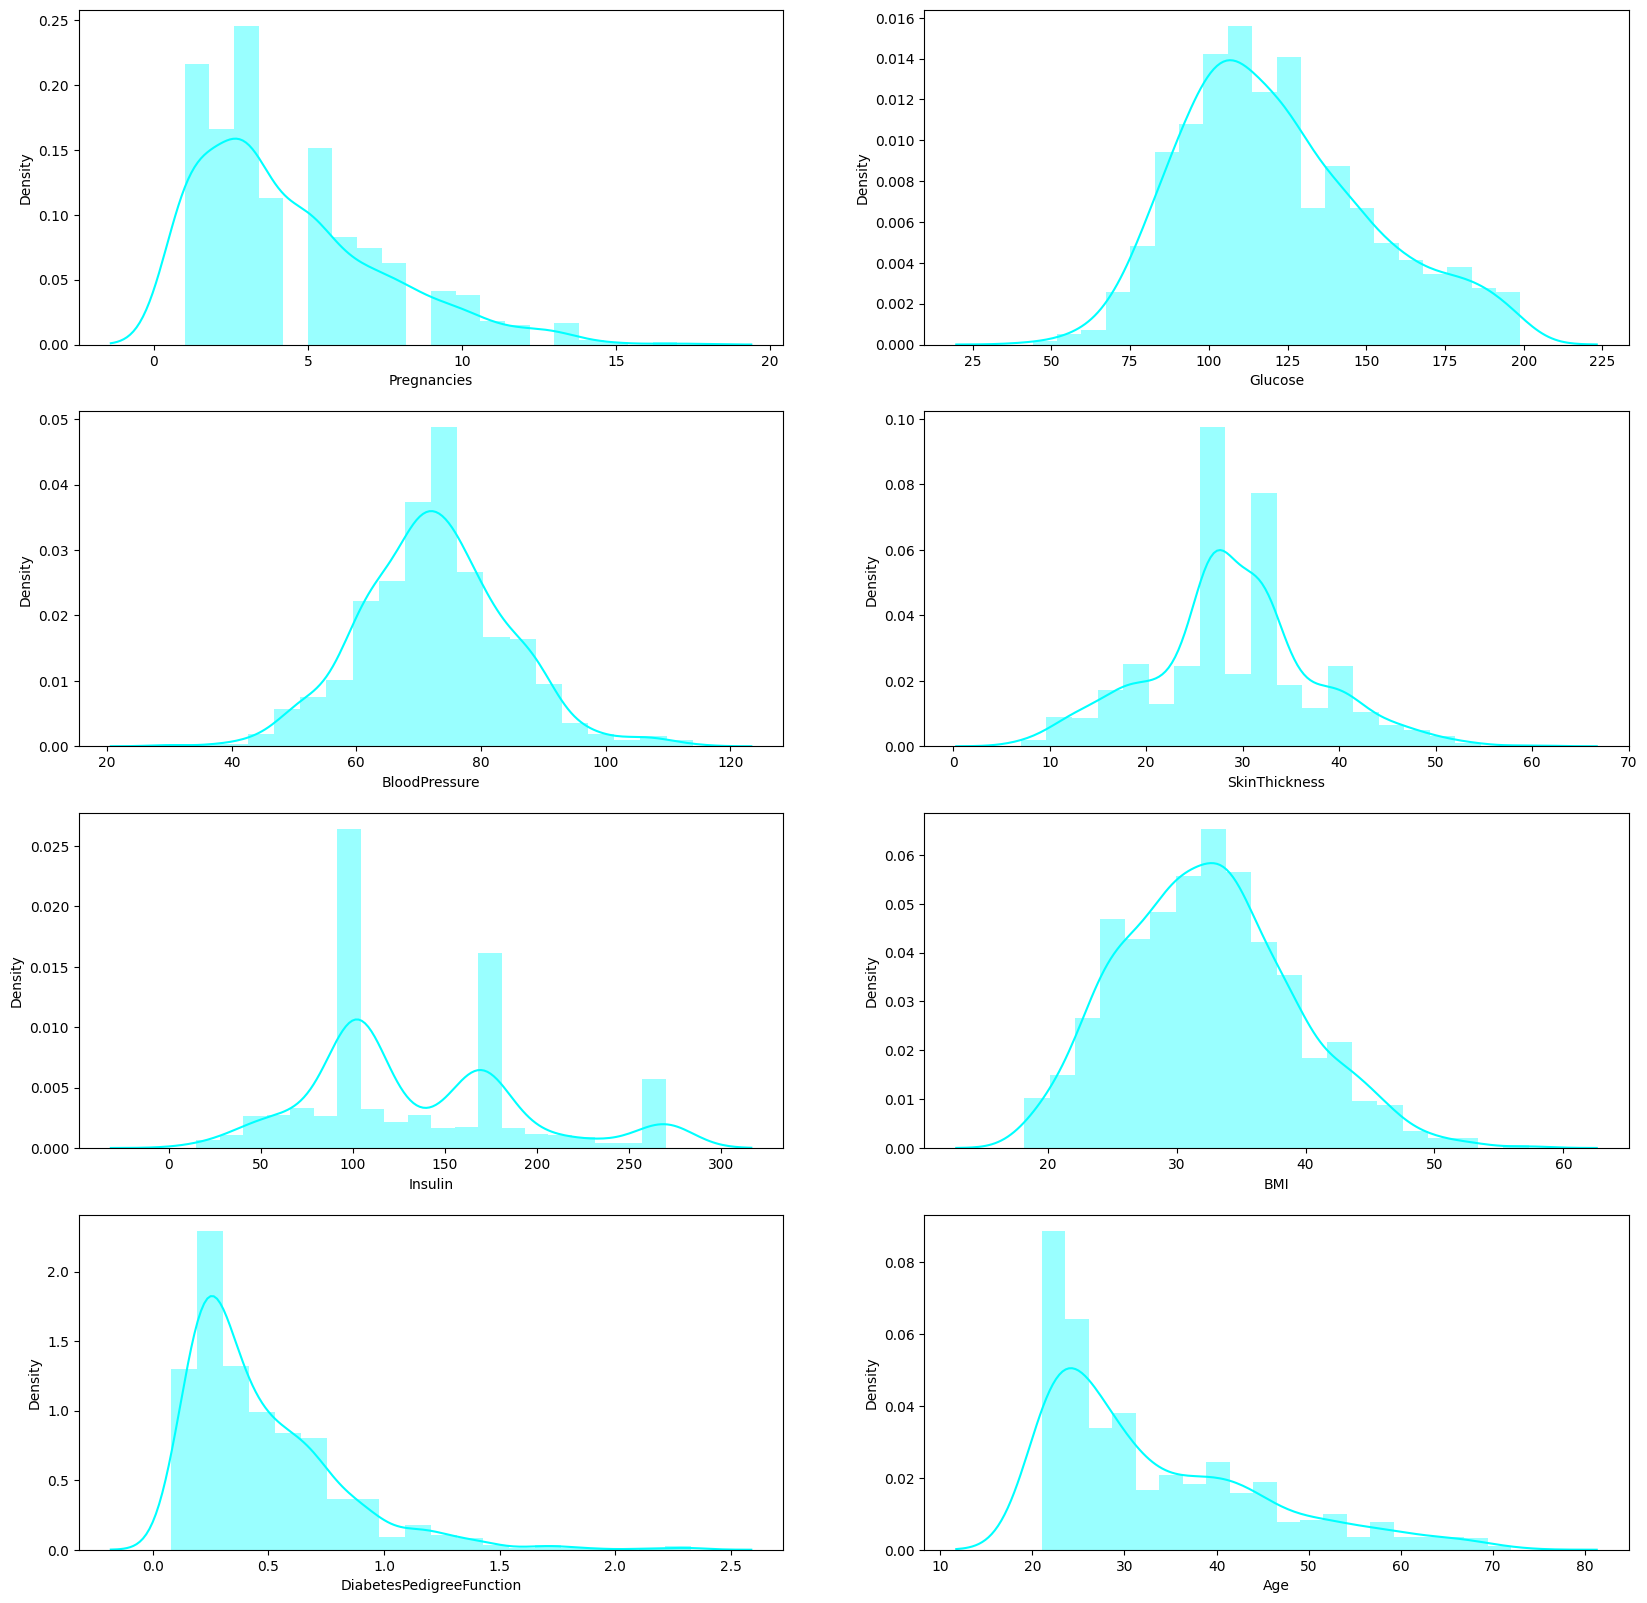

In [61]:
# Distribuição de densidade entre esses 8 histogramas.
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="cyan")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="cyan")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="cyan")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="cyan")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="cyan")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="cyan")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="cyan")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="cyan")

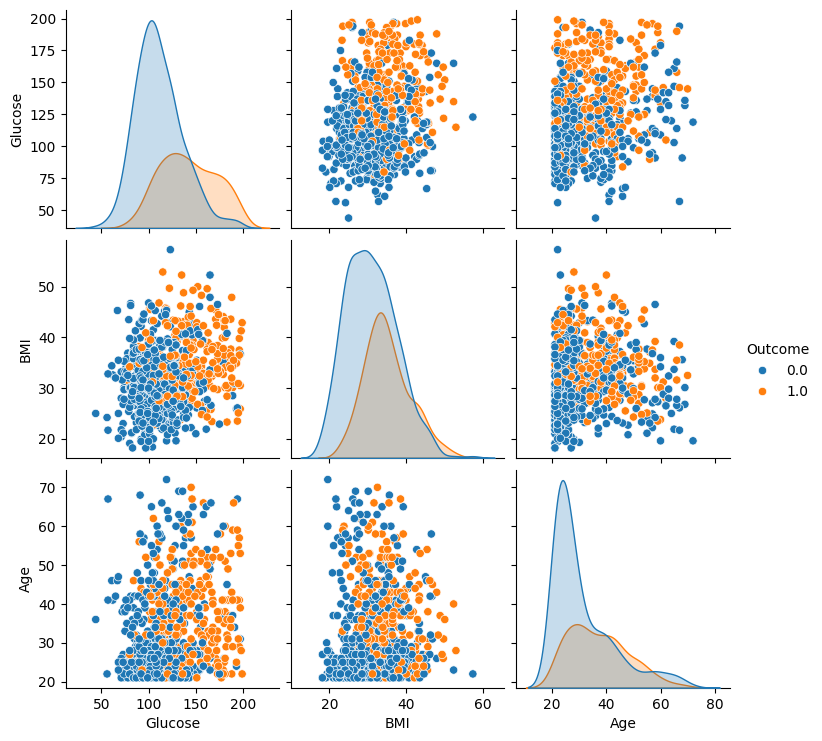

In [62]:
# visualizar as relações entre as variáveis Glucose, BMI e Age
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age'])
plt.show()

In [64]:
# Percorre todas as colunas do dataframe e calcula a média de cada variável
for col in df.columns:
    if str(col) !='Outcome':
        print(f"Mean of {col} grouped by Outcome:\n")
        print(df.groupby("Outcome").agg({col: 'mean'}))
        print("\n" + "="*50 + "\n")
    else:
        print("NOOOOO")

Mean of Pregnancies grouped by Outcome:

         Pregnancies
Outcome             
0.0         3.723014
1.0         5.616858


Mean of Glucose grouped by Outcome:

            Glucose
Outcome            
0.0      110.749491
1.0      142.088123


Mean of BloodPressure grouped by Outcome:

         BloodPressure
Outcome               
0.0          70.863544
1.0          75.383142


Mean of SkinThickness grouped by Outcome:

         SkinThickness
Outcome               
0.0          27.136456
1.0          32.134100


Mean of Insulin grouped by Outcome:

            Insulin
Outcome            
0.0      112.207739
1.0      174.181992


Mean of BMI grouped by Outcome:

               BMI
Outcome           
0.0      30.895519
1.0      35.031801


Mean of DiabetesPedigreeFunction grouped by Outcome:

         DiabetesPedigreeFunction
Outcome                          
0.0                      0.431084
1.0                      0.544877


Mean of Age grouped by Outcome:

               Age
Outcom

In [16]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [17]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:

def median_target(var):   
    temp = df[df[var].notnull()]
    
    median_values = temp.groupby('Outcome')[[var]].median().reset_index()
    
    return median_values

In [19]:
columns = df.columns.drop("Outcome")

for i in columns:
    median_vals = median_target(i)
    
    df.loc[(df['Outcome'] == 0) & (df[i].isnull()), i] = median_vals.loc[median_vals['Outcome'] == 0, i].values[0]
    
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()), i] = median_vals.loc[median_vals['Outcome'] == 1, i].values[0]

In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

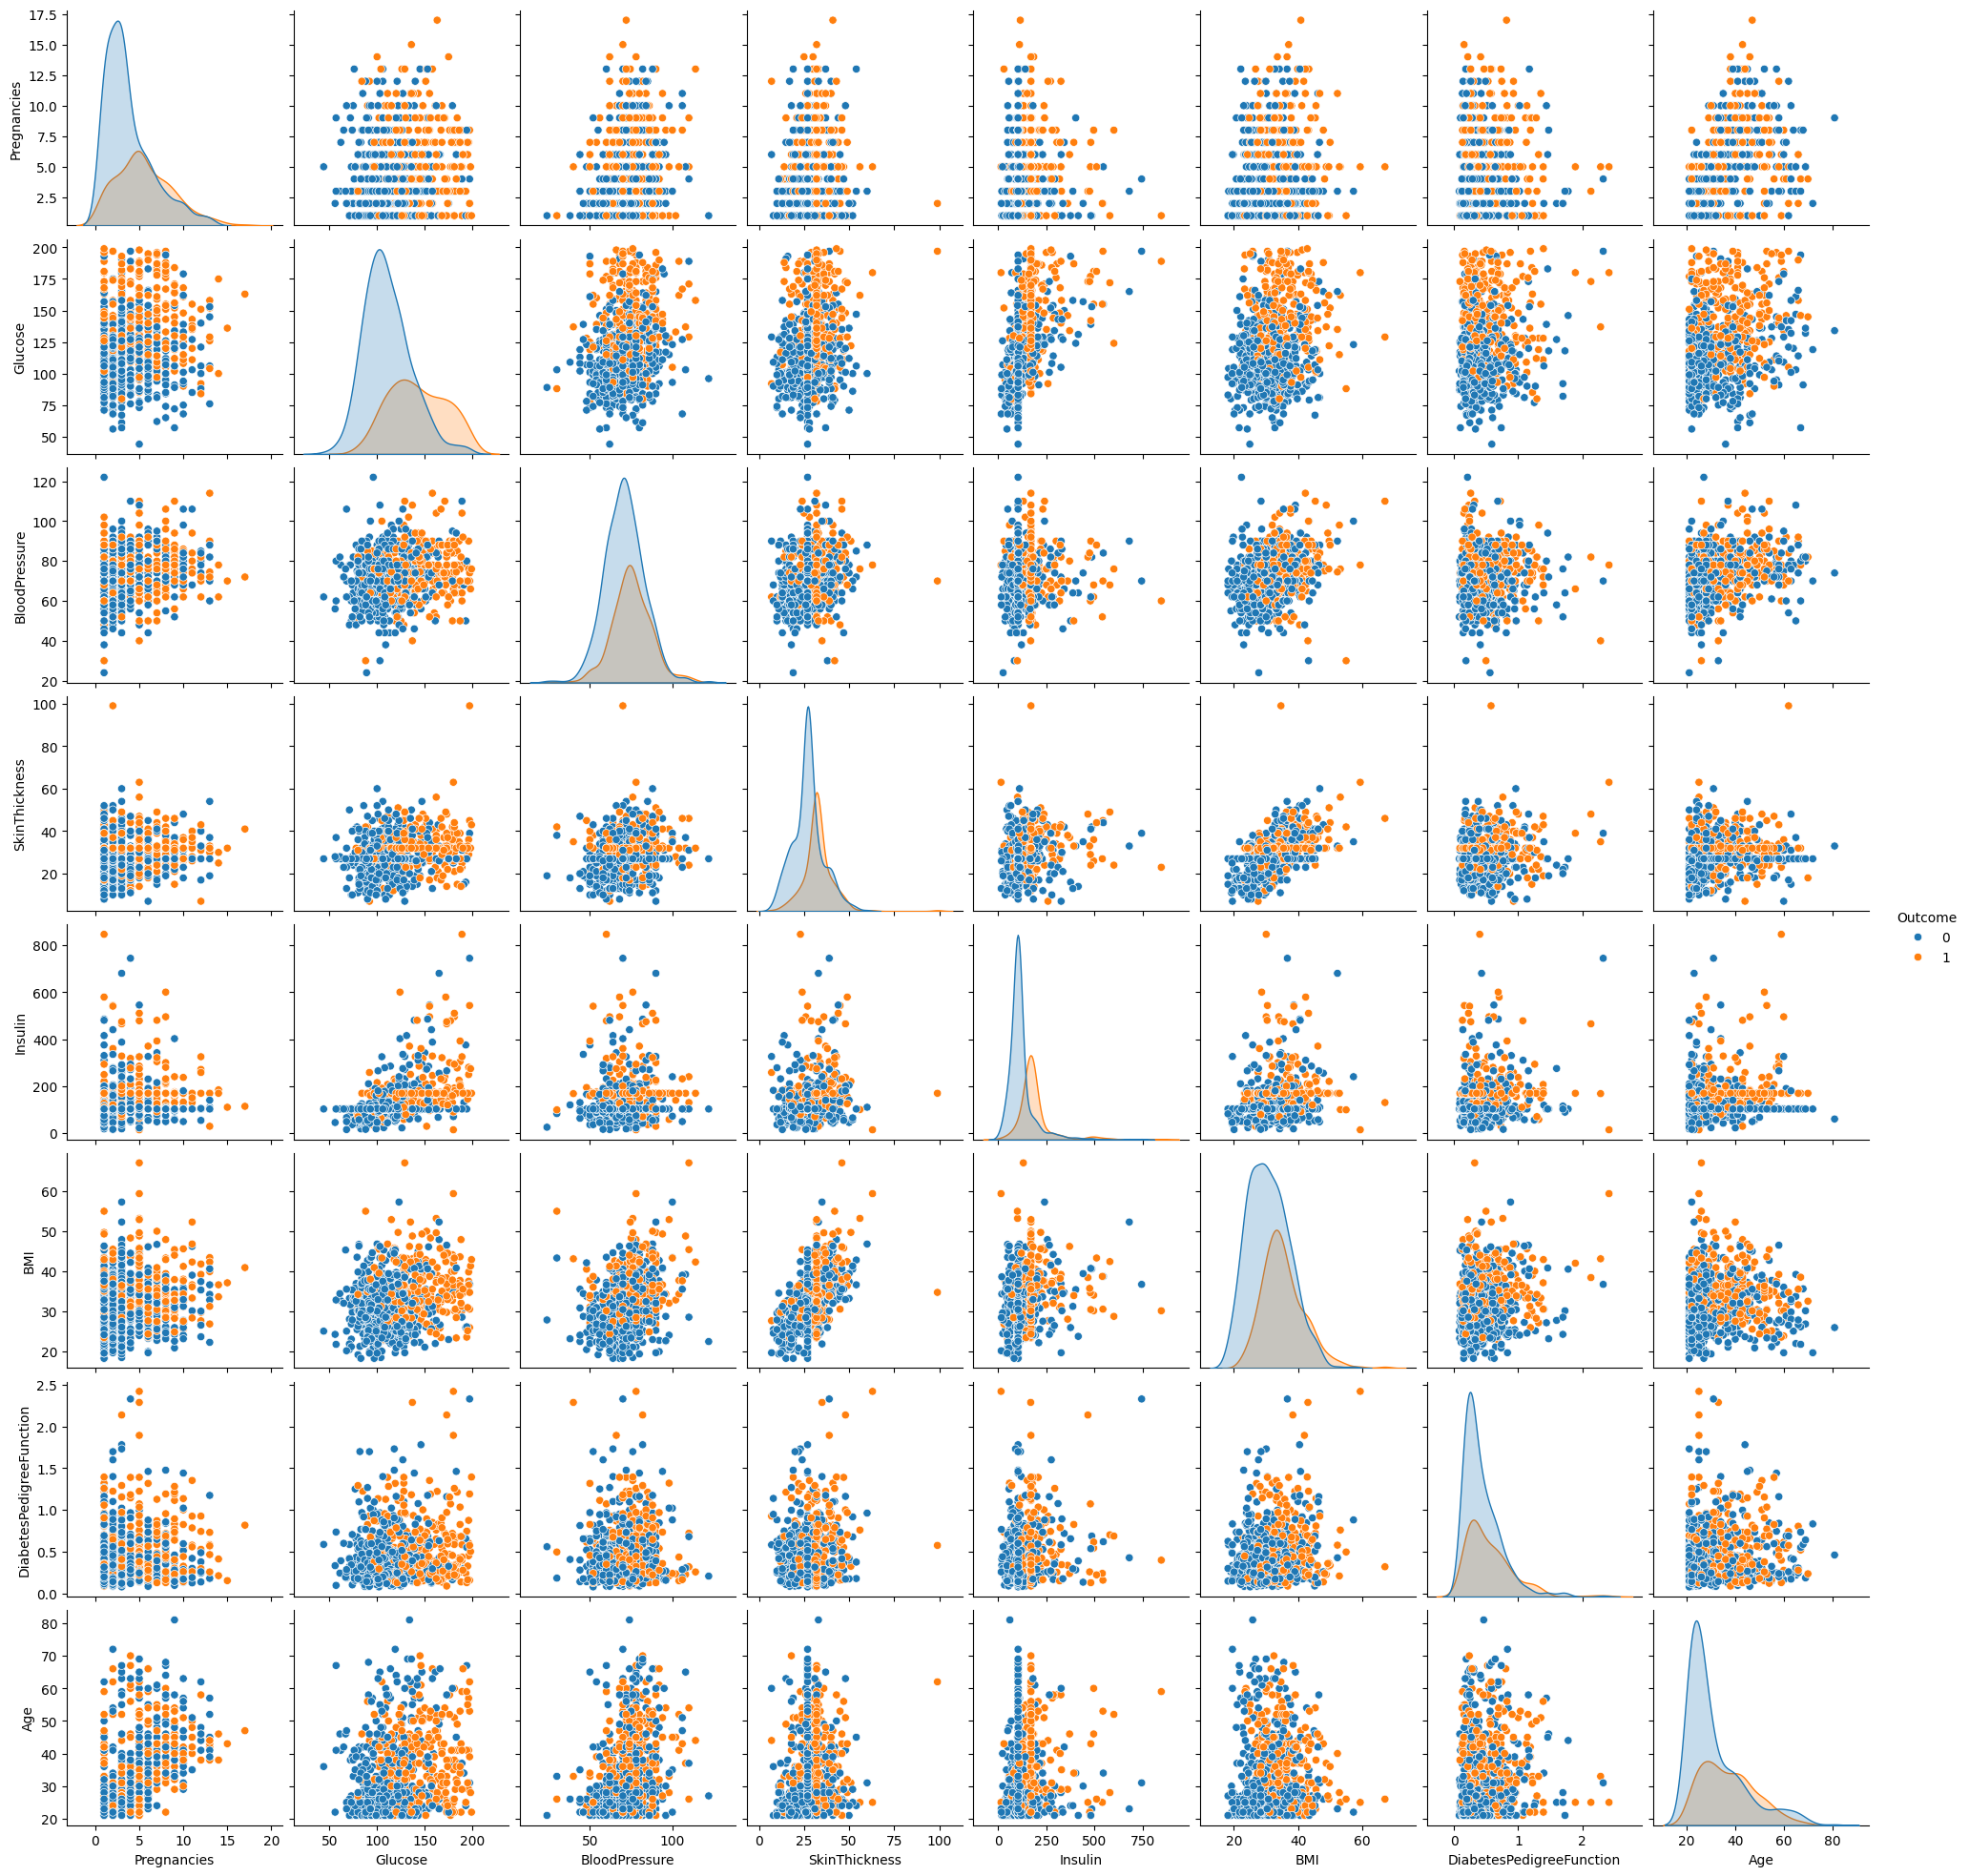

In [ ]:
# Identificar correlação entre as variaveis , observar padroes de separacao entre os grupos com e sem diabetes, detectar clusters ou relacoes nao lineares entre os dados.
p = sns.pairplot(df, hue="Outcome")


In [22]:
outlier_feature=[]
for col in df:
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.5)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low=q1-iqr*1.5
    high=q3+1.5*iqr
    if df[(df[col]>high)].any(axis=None):
        print(col,": yes")
        outlier_feature.append(str(col))
    else:
        print(col," : no")

Pregnancies : yes
Glucose  : no
BloodPressure : yes
SkinThickness : yes
Insulin : yes
BMI : yes
DiabetesPedigreeFunction : yes
Age : yes
Outcome  : no


In [65]:
outlier_feature

['Pregnancies',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [24]:
px.box(df["Insulin"])

In [25]:
q1=df["Insulin"].quantile(0.25)
q3=df["Insulin"].quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
upper=q3+1.5*IQR
df.loc[df["Insulin"]>upper, "Insulin"]=upper

In [26]:
px.box(df["Insulin"])

In [27]:
#Identificar pontos anômalos no dataset, que podem indicar erros nos dados ou casos raros.
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [28]:
# Identificar os outliers mais extremos no conjunto de dados.
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [29]:
thresold = np.sort(df_scores)[7]
thresold

-1.7497423670960557

In [30]:
outlier = df_scores>thresold
df = df[outlier]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
NewBMI=pd.Series(["UnderWeight","Normal","OverWeihgt","Obesity1","Obesity2","Obesity3"])
NewBMI

0    UnderWeight
1         Normal
2     OverWeihgt
3       Obesity1
4       Obesity2
5       Obesity3
dtype: object

In [32]:
df["NewBMI"]=NewBMI

df.loc[df["BMI"]<18.5,"NewBMI"]=NewBMI[0]
df.loc[(df["BMI"]>18.5) & (df["BMI"]< 24.9),"NewBMI"]=NewBMI[1]
df.loc[(df["BMI"]>24.9) & (df["BMI"]< 29.9),"NewBMI"]=NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3


In [34]:
df["NewBMI"].value_counts()

NewBMI
Obesity2    666
Obesity3     94
Name: count, dtype: int64

In [35]:
def set_Insulin(row):
    if row>=16 and row<=166:
        return "Normal"
    else:
        return "AbNormal"

In [66]:
# Transformar ou categorizar os valores de insulina.
# Criar uma nova variável que pode ser útil para análise ou modelagem de Machine Learning.
df["NewInsulin"]=df["Insulin"].apply(lambda x : set_Insulin(x))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity2,NewBMI_Obesity3,NewInsulin_AbNormal,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewInsulin
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,AbNormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,AbNormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,AbNormal


In [37]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose

In [38]:
# Criar uma variável categórica para os níveis de glicose, facilitando a análise e o treinamento de modelos de Machine Learning.
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity2,AbNormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity2,AbNormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3,AbNormal,Secret


In [67]:
# Converter variáveis categóricas em formato numérico para serem usadas em modelos de Machine Learning.

from sklearn.preprocessing import OneHotEncoder
import pandas as pd


OHE = OneHotEncoder()

new_cols = df[["NewBMI", "NewInsulin", "NewGlucose"]]

NEWcols = OHE.fit_transform(new_cols)

NEWcols_df = pd.DataFrame(NEWcols.toarray(), columns=OHE.get_feature_names_out(new_cols.columns))

NEWcols_df.head()

KeyError: "['NewBMI', 'NewGlucose'] not in index"

In [40]:
df=pd.concat([df,NEWcols_df],axis=1)
df.dropna(inplace=True)

In [41]:

df.drop(['NewBMI','NewInsulin', 'NewGlucose'],axis=1,inplace=True)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity2',
       'NewBMI_Obesity3', 'NewInsulin_AbNormal', 'NewInsulin_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret'],
      dtype='object')

In [42]:
categorical_df = df[['NewBMI_Obesity2',
       'NewBMI_Obesity3', 'NewInsulin_AbNormal', 'NewInsulin_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret']]

In [43]:
categorical_df.head()

,NewBMI_Obesity2,NewBMI_Obesity3,NewInsulin_AbNormal,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Modelo

In [44]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [45]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity2,NewBMI_Obesity3,NewInsulin_AbNormal,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [46]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
x=transformer.transform(x)
x=pd.DataFrame(x)

In [47]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.75,0.770186,0.000,1.000000,1.000000,0.172222,0.661039,1.235294,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0
1,-0.50,-0.795031,-0.375,0.142857,0.000000,-0.605556,-0.055844,0.117647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.25,1.639752,-0.500,0.571429,1.000000,-0.972222,0.777922,0.176471,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0
3,-0.50,-0.695652,-0.375,-0.714286,-0.126866,-0.438889,-0.533766,-0.470588,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.50,0.496894,-2.000,1.000000,0.977612,1.227778,4.975325,0.235294,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,1.0


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
scaler =StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [50]:
model1=LogisticRegression()
model2=SVC(kernel='rbf', C=1.0)
model3=RandomForestClassifier(class_weight="balanced",criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
model4=GradientBoostingClassifier(n_estimators=1000)
model5=RandomForestClassifier()

In [51]:
cols=["LogisticRegression","SVC","RandomForestClassifier","GradientBoostingClassifier"]
result1=[]
result2=[]
result3=[]

In [68]:
# Treinar e avaliar modelos de Machine Learning de forma padronizada.
# Comparar modelos diferentes rapidamente usando métricas de desempenho.
# Visualizar a matriz de confusão para entender os erros do modelo.
def result_model(model):
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    acc=accuracy_score(preds,y_test)
    rec=recall_score(preds,y_test)
    f1=f1_score(preds,y_test)
    
    result1.append(acc)
    result2.append(rec)
    result3.append(f1)
    print(model)
    print(f"Accuracy is : {acc} , The Recall is : {rec} And The F1_Score is {f1}")
    print(classification_report(y_test, preds))
    fig=px.imshow(confusion_matrix(preds,y_test),text_auto='.02')
    fig.show()

In [53]:
result_model(model1)

LogisticRegression()
Accuracy is : 0.8278145695364238 , The Recall is : 0.7619047619047619 And The F1_Score is 0.7111111111111111
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       103
         1.0       0.76      0.67      0.71        48

    accuracy                           0.83       151
   macro avg       0.81      0.78      0.79       151
weighted avg       0.82      0.83      0.82       151



In [54]:
result_model(model2)

SVC()
Accuracy is : 0.8741721854304636 , The Recall is : 0.8717948717948718 And The F1_Score is 0.7816091954022989
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       103
         1.0       0.87      0.71      0.78        48

    accuracy                           0.87       151
   macro avg       0.87      0.83      0.85       151
weighted avg       0.87      0.87      0.87       151



In [55]:
result_model(model3)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=0.75, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)
Accuracy is : 0.8874172185430463 , The Recall is : 0.803921568627451 And The F1_Score is 0.8282828282828283
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       103
         1.0       0.80      0.85      0.83        48

    accuracy                           0.89       151
   macro avg       0.87      0.88      0.87       151
weighted avg       0.89      0.89      0.89       151



In [56]:
result_model(model4)

GradientBoostingClassifier(n_estimators=1000)
Accuracy is : 0.8807947019867549 , The Recall is : 0.8409090909090909 And The F1_Score is 0.8043478260869565
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       103
         1.0       0.84      0.77      0.80        48

    accuracy                           0.88       151
   macro avg       0.87      0.85      0.86       151
weighted avg       0.88      0.88      0.88       151



In [57]:
final_result=pd.DataFrame({"Algorithm":cols,"Accuracy":result1,"Recall":result2,"F1_score":result3})
final_result

,Algorithm,Accuracy,Recall,F1_score
0,LogisticRegression,0.827815,0.761905,0.711111
1,SVC,0.874172,0.871795,0.781609
2,RandomForestClassifier,0.887417,0.803922,0.828283
3,GradientBoostingClassifier,0.880795,0.840909,0.804348


In [58]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=final_result['Algorithm'], y=final_result['Accuracy'], mode='lines+markers', name='Accuracy'))

fig.add_trace(go.Scatter(x=final_result['Algorithm'], y=final_result['Recall'], mode='lines+markers', name='Recall'))

fig.add_trace(go.Scatter(x=final_result['Algorithm'], y=final_result['F1_score'], mode='lines+markers', name='F1 Score'))

fig.show()